## ATTENTIOM-BIDIRECTIONAL LSTM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

time_series_data = pd.read_csv("D:/all_machine_learning_trials/cv_2_1/sequential_data/traffic_volume.csv")
time_series_data

,DATE,TIME,BICYCLE,BUS,CAR,JEEPNEY,MOTORCYCLE,MULTICAB,TRICYCLE,TRUCK,VAN,TOTAL
0,2024-11-18,00:05:00,0,0,0,0,0,0,0,0,0,0
1,2024-11-18,00:05:00,0,0,0,0,0,0,0,0,0,0
2,2024-11-18,00:05:00,0,0,0,0,0,0,0,0,0,0
3,2024-11-18,00:05:00,0,0,0,0,0,0,0,0,0,0
4,2024-11-18,00:05:00,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3818,2024-11-19,00:00:00,0,0,0,1,0,0,0,0,0,0
3819,2024-11-19,00:00:00,0,0,0,1,0,0,0,0,0,0
3820,2024-11-19,00:00:00,0,0,0,1,0,0,0,0,0,0
3821,2024-11-19,00:00:00,0,0,0,1,0,0,0,0,0,0


In [2]:
time_series_data.shape

(3823, 12)

## Data cleaning

In [3]:

df = time_series_data.drop_duplicates(subset=["TIME"])
df = df.reset_index()
df.shape

(288, 13)

In [4]:
df[100:150]

,index,DATE,TIME,BICYCLE,BUS,CAR,JEEPNEY,MOTORCYCLE,MULTICAB,TRICYCLE,TRUCK,VAN,TOTAL
100,1398,2024-11-18,08:25:00,0,0,1,6,1,2,5,1,2,18
101,1412,2024-11-18,08:30:00,0,0,3,11,0,3,3,3,2,25
102,1426,2024-11-18,08:35:00,1,0,1,3,0,4,7,1,1,18
103,1440,2024-11-18,08:40:00,0,0,3,7,1,4,3,1,2,21
104,1453,2024-11-18,08:45:00,0,0,6,7,2,1,6,1,3,26
105,1467,2024-11-18,08:50:00,1,0,5,7,1,3,8,3,3,31
106,1482,2024-11-18,08:55:00,1,0,5,8,0,3,4,1,3,25
107,1496,2024-11-18,09:00:00,0,1,3,6,1,4,4,1,2,22
108,1510,2024-11-18,09:05:00,2,0,5,10,2,4,6,1,4,34
109,1524,2024-11-18,09:10:00,0,1,4,4,0,4,7,3,3,26


In [5]:
df['datetime'] = df['DATE'] + " " + df['TIME']

df.index = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')
df

,index,DATE,TIME,BICYCLE,BUS,CAR,JEEPNEY,MOTORCYCLE,MULTICAB,TRICYCLE,TRUCK,VAN,TOTAL,datetime
datetime,,,,,,,,,,,,,,
2024-11-18 00:05:00,0,2024-11-18,00:05:00,0,0,0,0,0,0,0,0,0,0,2024-11-18 00:05:00
2024-11-18 00:10:00,14,2024-11-18,00:10:00,0,0,0,0,0,0,0,0,0,0,2024-11-18 00:10:00
2024-11-18 00:15:00,28,2024-11-18,00:15:00,0,0,0,1,0,0,0,0,0,1,2024-11-18 00:15:00
2024-11-18 00:20:00,42,2024-11-18,00:20:00,0,0,0,1,0,0,0,0,0,0,2024-11-18 00:20:00
2024-11-18 00:25:00,56,2024-11-18,00:25:00,0,0,0,0,0,0,0,0,0,0,2024-11-18 00:25:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-18 23:40:00,3759,2024-11-18,23:40:00,0,0,0,0,0,0,0,0,0,0,2024-11-18 23:40:00
2024-11-18 23:45:00,3772,2024-11-18,23:45:00,0,0,0,0,0,0,0,0,0,0,2024-11-18 23:45:00
2024-11-18 23:50:00,3785,2024-11-18,23:50:00,0,0,0,0,0,0,0,0,0,0,2024-11-18 23:50:00


In [6]:
df[['INTERVAL_COUNT']] = df[['TOTAL']]
df = df[['INTERVAL_COUNT']]
df

,INTERVAL_COUNT
datetime,
2024-11-18 00:05:00,0
2024-11-18 00:10:00,0
2024-11-18 00:15:00,1
2024-11-18 00:20:00,0
2024-11-18 00:25:00,0
...,...
2024-11-18 23:40:00,0
2024-11-18 23:45:00,0
2024-11-18 23:50:00,0


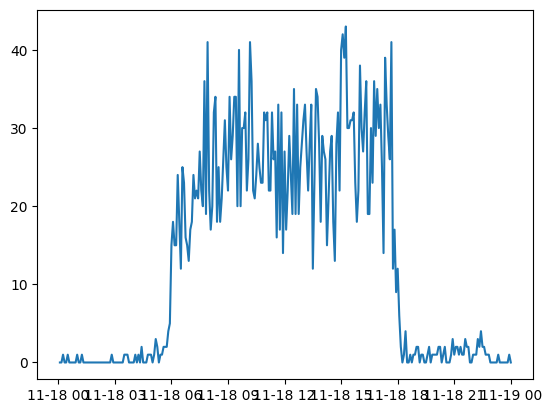

In [7]:
interval_count = df['INTERVAL_COUNT']
plt.plot(interval_count)

## TRAINING LSTM MODEL

In [8]:
import torch

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [9]:
interval_count.isna()

datetime
2024-11-18 00:05:00    False
2024-11-18 00:10:00    False
2024-11-18 00:15:00    False
2024-11-18 00:20:00    False
2024-11-18 00:25:00    False
                       ...  
2024-11-18 23:40:00    False
2024-11-18 23:45:00    False
2024-11-18 23:50:00    False
2024-11-18 23:55:00    False
2024-11-19 00:00:00    False
Name: INTERVAL_COUNT, Length: 288, dtype: bool

### Data Preprocessing

In [10]:
def df_to_timeseries(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        future_val = df_as_np[i+window_size]
        y.append(future_val)
    return X, y

In [11]:
WINDOW_SIZE = 5

X, y = df_to_timeseries(interval_count, WINDOW_SIZE)
X = np.array(X)
y = np.array(y)
X.shape, y.shape

((283, 5, 1), (283,))

In [12]:
from copy import deepcopy as dc

def trasform_to_series(df, n_steps):
    df = dc(df)

    for i in range(1, n_steps+1):
        df[f'INTERVAL_COUNT(t-{i})'] = df['INTERVAL_COUNT'].shift(-i)

    df.dropna(inplace=True)

    return df

timeseries_df = trasform_to_series(df, WINDOW_SIZE)

timeseries_df

,INTERVAL_COUNT,INTERVAL_COUNT(t-1),INTERVAL_COUNT(t-2),INTERVAL_COUNT(t-3),INTERVAL_COUNT(t-4),INTERVAL_COUNT(t-5)
datetime,,,,,,
2024-11-18 00:05:00,0,0.0,1.0,0.0,0.0,1.0
2024-11-18 00:10:00,0,1.0,0.0,0.0,1.0,0.0
2024-11-18 00:15:00,1,0.0,0.0,1.0,0.0,0.0
2024-11-18 00:20:00,0,0.0,1.0,0.0,0.0,0.0
2024-11-18 00:25:00,0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2024-11-18 23:15:00,0,1.0,0.0,0.0,0.0,0.0
2024-11-18 23:20:00,1,0.0,0.0,0.0,0.0,0.0
2024-11-18 23:25:00,0,0.0,0.0,0.0,0.0,0.0


In [13]:
# TRAINING
X_train, y_train = X[:197], y[:197] # 80%
X_val, y_val = X[197:253], y[197:253] # 20%
X_test, y_test = X[253:], y[253:] # 10%

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((197, 5, 1), (197,), (56, 5, 1), (56,), (30, 5, 1), (30,))

In [14]:
import keras
from keras import layers
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional




def biderectional_lstm_attention_model(input_shape):

    inputs = keras.Input(shape=input_shape)
    lstm_units = 256
    
    lstm = Bidirectional(LSTM(lstm_units, return_sequences=True))(inputs)
 


    # Attention mechanism
    attention = layers.Dense(1, activation='tanh')(lstm)
    attention = layers.Flatten()(attention)
    attention = layers.Activation('softmax')(attention)
    attention = layers.RepeatVector(lstm_units*2)(attention)
    attention = layers.Permute([2, 1])(attention)
    attention = layers.Multiply()([lstm, attention])
    attention = layers.Lambda(lambda x: tf.reduce_sum(x, axis=1))(attention)

    # Output layer
    outputs = layers.Dense(1)(attention)

    # Compile the model
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(), 'accuracy'])
    return model

In [15]:
model = biderectional_lstm_attention_model(input_shape = (WINDOW_SIZE, 1))

In [16]:
checkpoint = ModelCheckpoint('novel_model/checkpoint.model.keras', save_best_only=True)

In [17]:
import time

t0 = time.time()

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, callbacks=[checkpoint])

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 223ms/step - accuracy: 0.2359 - loss: 479.3714 - root_mean_squared_error: 21.8924 - val_accuracy: 0.2143 - val_loss: 184.2349 - val_root_mean_squared_error: 13.5733
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.2280 - loss: 439.2811 - root_mean_squared_error: 20.9457 - val_accuracy: 0.1964 - val_loss: 177.4921 - val_root_mean_squared_error: 13.3226
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.1921 - loss: 472.9678 - root_mean_squared_error: 21.7118 - val_accuracy: 0.2143 - val_loss: 170.9565 - val_root_mean_squared_error: 13.0750
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.1953 - loss: 431.0983 - root_mean_squared_error: 20.7560 - val_accuracy: 0.1964 - val_loss: 164.5740 - val_root_mean_squared_error: 12.8286
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.2404 - loss: 396.6220 - root_mean_squared_error: 19.9093 - val_accuracy: 0.1964 - val_loss: 158.3859 - val_root_mean_sq

In [18]:
t1 = time.time()
speed = t1-t0

print(speed)

76.16776728630066


In [19]:
# from tensorflow.keras.models import load_model
# novel_model = load_model('novel_model/checkpoint.model.keras', safe_mode=False)

In [20]:
date_time = df.index[:197]

train_predictions = model.predict(X_train).flatten()


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


In [21]:
train_predictions.shape

(197,)

In [22]:
train_results = pd.DataFrame(data={'Train Predictions' :train_predictions, 'Actuals' :y_train})
train_results.index = date_time
train_results

,Train Predictions,Actuals
datetime,,
2024-11-18 00:05:00,0.068005,1
2024-11-18 00:10:00,0.379259,0
2024-11-18 00:15:00,0.306560,0
2024-11-18 00:20:00,0.068005,0
2024-11-18 00:25:00,0.032537,0
...,...,...
2024-11-18 16:05:00,27.851452,19
2024-11-18 16:10:00,27.626072,30
2024-11-18 16:15:00,28.347820,23


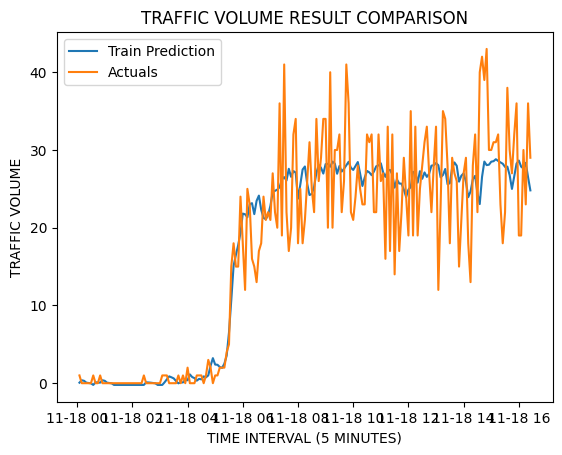

In [23]:
plt.plot(train_results['Train Predictions'], label='Train Prediction')
plt.plot(train_results['Actuals'], label='Actuals')

plt.legend()
plt.title('TRAFFIC VOLUME RESULT COMPARISON')
plt.xlabel('TIME INTERVAL (5 MINUTES)')
plt.ylabel('TRAFFIC VOLUME')
plt.show()

In [24]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error

print ('R-Squared:',r2_score(y_train, train_predictions))
print ('Mean Squared Error:', mean_squared_error (y_train, train_predictions))
print ('Mean Absolute Error:', mean_absolute_error (y_train, train_predictions))
print ('Root Mean Squared Error:', root_mean_squared_error (y_train, train_predictions))

R-Squared: 0.836321234703064
Mean Squared Error: 28.76569175720215
Mean Absolute Error: 3.7516446113586426
Root Mean Squared Error: 5.363365650177002
